## 1- Import libraries

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

## 2- Import the database
Often it may happen, the dataset in .csv file format has data items separated by a delimiter other than a comma. This includes semicolon, colon, tab space, vertical bars, etc. In such cases, we need to use the sep parameter inside the read.csv() function. the defult delimeter in read_csv is ',' if the seperator is somthing other than ',' we should define it by sep=' '
argument in read_csv. 
some other seperators are: <br> 
1- **' ; '** <br>
2- **' | '** <br>
3- **' : '** <br>
4- **' __ '** <br>
5- **'\s+'**  it matches wth any type of white space <br> 
6- **'[:, | _]'** <br>
7- **'\t'** it only matches with **tab** character<br>

In [10]:
database = pd.read_csv('3kys.cif_ringEdges', sep = '\t' )

In [11]:
database

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model
0,A:196:_:ILE,HBOND:MC_MC,A:203:_:LEU,3.378,44.861,17.0,O,N,A:203:_:LEU,NaN,NaN,NaN,1
1,A:196:_:ILE,VDW:SC_SC,A:405:_:ILE,3.220,NaN,6.0,CD1,CD1,NaN,NaN,NaN,NaN,1
2,A:198:_:THR,HBOND:MC_MC,A:201:_:LEU,3.124,34.375,17.0,N,O,A:198:_:THR,NaN,NaN,NaN,1
3,A:198:_:THR,VDW:MC_SC,A:202:_:ARG,3.755,NaN,6.0,C,CG,NaN,NaN,NaN,NaN,1
4,A:198:_:THR,VDW:SC_SC,A:268:_:ASN,3.715,NaN,6.0,CG2,ND2,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,A:378:_:ASN,HBOND:MC_MC,A:382:_:GLN,2.666,38.796,17.0,O,N,A:382:_:GLN,NaN,NaN,NaN,1
342,A:378:_:ASN,HBOND:MC_MC,A:383:_:GLU,2.907,15.018,17.0,N,O,A:378:_:ASN,NaN,NaN,NaN,1
343,A:379:_:ARG,VDW:MC_SC,A:382:_:GLN,3.633,NaN,6.0,C,NE2,NaN,NaN,NaN,NaN,1
344,A:392:_:PHE,IAC:SC_LIG,A:344:_:P1L,4.215,NaN,0.0,CB,C22,NaN,NaN,NaN,NaN,1


## 3- Parsing the dataset and presenting data (count and values)

In this step the interaction column is splited based on ':' and converted into two separate columns 'Int_type' and 'Int_chain'. split method of strings is exploited to perform this step and then the original column of 'Interaction' is dropped by drop method. 

In [12]:
database[['Int_type','Int_chain']] = database.Interaction.str.split(":", expand =True,)
database.drop(columns =["Interaction"], inplace = True)
database

,NodeId1,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model,Int_type,Int_chain
0,A:196:_:ILE,A:203:_:LEU,3.378,44.861,17.0,O,N,A:203:_:LEU,NaN,NaN,NaN,1,HBOND,MC_MC
1,A:196:_:ILE,A:405:_:ILE,3.220,NaN,6.0,CD1,CD1,NaN,NaN,NaN,NaN,1,VDW,SC_SC
2,A:198:_:THR,A:201:_:LEU,3.124,34.375,17.0,N,O,A:198:_:THR,NaN,NaN,NaN,1,HBOND,MC_MC
3,A:198:_:THR,A:202:_:ARG,3.755,NaN,6.0,C,CG,NaN,NaN,NaN,NaN,1,VDW,MC_SC
4,A:198:_:THR,A:268:_:ASN,3.715,NaN,6.0,CG2,ND2,NaN,NaN,NaN,NaN,1,VDW,SC_SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,A:378:_:ASN,A:382:_:GLN,2.666,38.796,17.0,O,N,A:382:_:GLN,NaN,NaN,NaN,1,HBOND,MC_MC
342,A:378:_:ASN,A:383:_:GLU,2.907,15.018,17.0,N,O,A:378:_:ASN,NaN,NaN,NaN,1,HBOND,MC_MC
343,A:379:_:ARG,A:382:_:GLN,3.633,NaN,6.0,C,NE2,NaN,NaN,NaN,NaN,1,VDW,MC_SC
344,A:392:_:PHE,A:344:_:P1L,4.215,NaN,0.0,CB,C22,NaN,NaN,NaN,NaN,1,IAC,SC_LIG


**Hint** we can count categorical data with **.value_counts()** function and check if a coulmn has empty cells or not we can use **.hasnans** method

In [13]:
database.Int_type.value_counts()

VDW          198
HBOND        111
IAC           20
PIPISTACK     11
IONIC          5
PICATION       1
Name: Int_type, dtype: int64

In [14]:
database.Int_type.hasnans

False

In [15]:
database.Int_chain.value_counts()

SC_SC     174
MC_MC     105
MC_SC      25
SC_LIG     19
SC_MC      17
MC_LIG      6
Name: Int_chain, dtype: int64

## 4- Statistics

To obtain the statistical information I used the seaborn library to show the distributions of distance and energy among different interactions. As illustrated in the boxplot figure below the H-bond has the lowest amount of distance and pipistack has the highest amount of distance among all types of interaction. This analysis is also performed on exploring the amount of energy among different interaction types and as illustrated in barplot the Ionic bond has the highest amount of energy and IAC has the lowest amount of energy. 


<AxesSubplot:xlabel='Int_type', ylabel='Distance'>

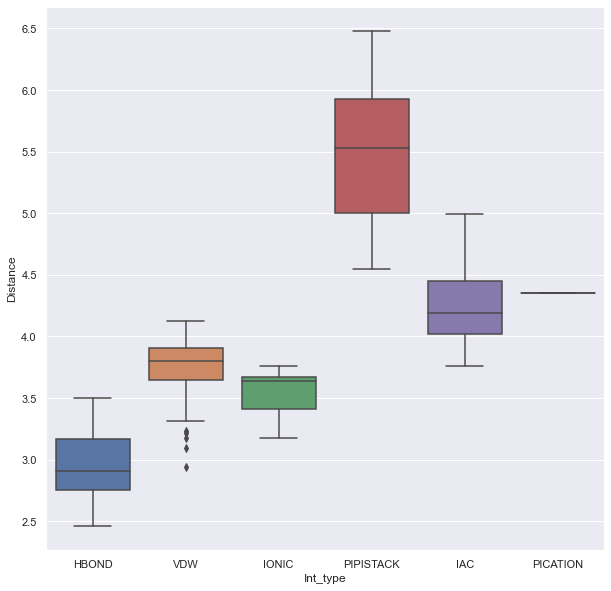

In [16]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data = database, x = 'Int_type' , y ='Distance' )

<AxesSubplot:xlabel='Int_type', ylabel='Energy'>

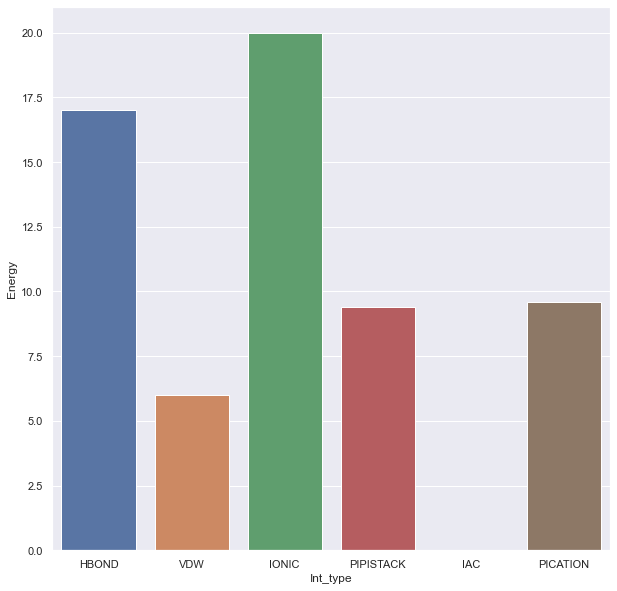

In [17]:
sns.barplot(data = database, x = 'Int_type' , y ='Energy' )

## 5- Create a distance distribution plot for eaxh interaction type

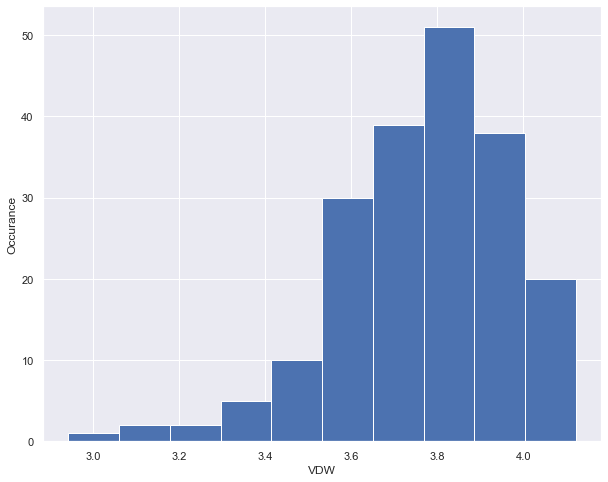

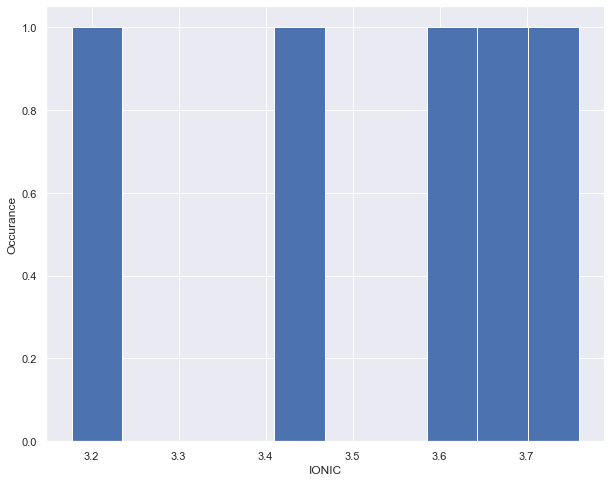

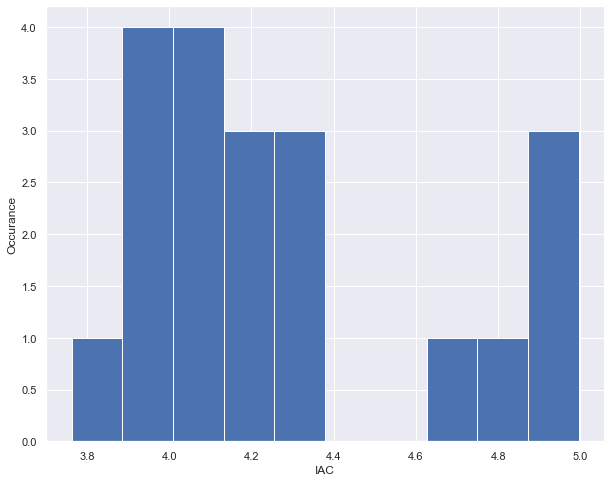

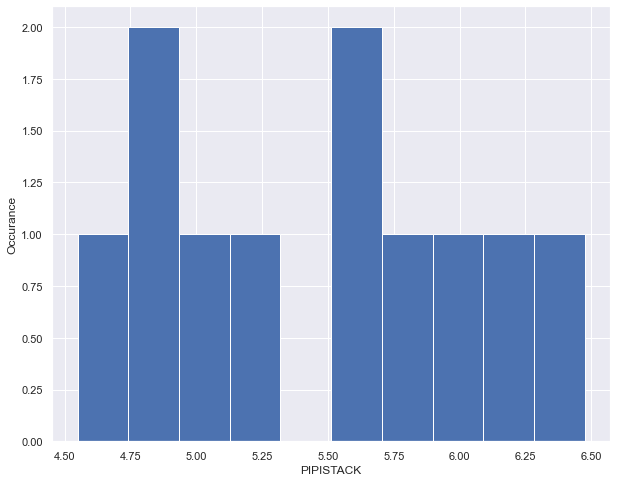

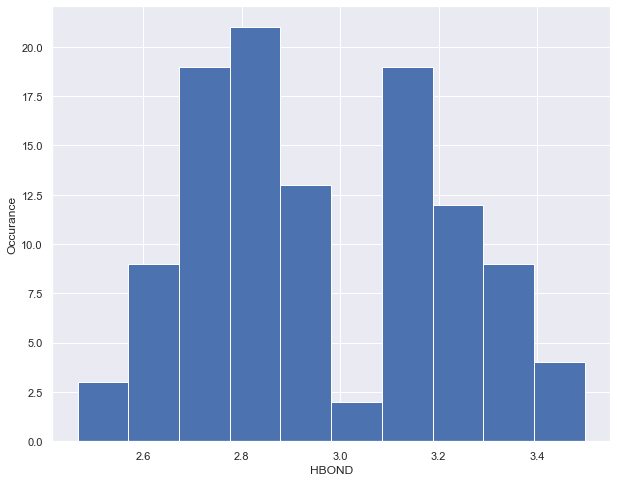

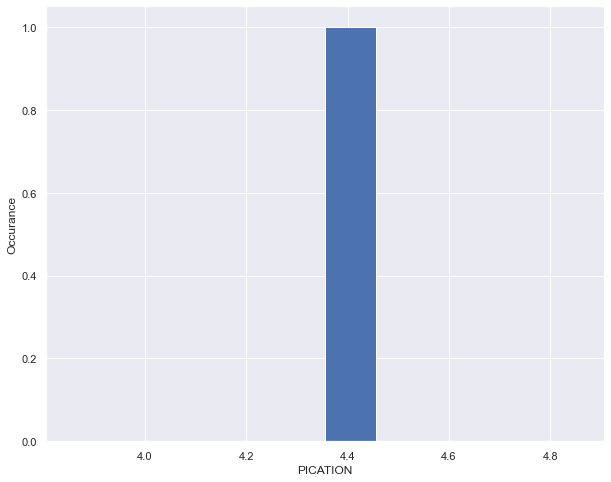

In [30]:
for int_type in set(database.Int_type):
    fig , ax = plt.subplots(figsize = (10,8))
    database.Distance[database.Int_type == int_type].hist(ax=ax , bins =10)
    plt.xlabel(int_type)
    plt.ylabel('Occurance')

## 6- Creating a dictionary for atoms participated in VDW interaction

As the Distance column above represented distances between the center of 2 atoms we want to generate a code able to subtract the radius of two atoms in a VDW interaction and give us the updated distance. In continue you can see my code and then the smarter code (which has been written by my mentor).<br>
**My solution:** 
First I extracted all types of atoms participate in VDW interaction from Atom1 and Atom2 columns. As shown below this type of interaction is driven by four atoms (**Carbon**, **Nitrogen**, **Sulphur**, **Oxygen**). So, in the next step I created a dictionary contains the radius of each Atom.  

In [165]:
database.Atom1[database.Int_type == 'VDW'].value_counts()

CD1    41
CB     41
C      25
CG2    18
CE1    14
CD2    10
CG1    10
CG     10
CD      9
CE      6
CE2     4
NE2     3
SG      3
CZ      2
OE1     1
OD1     1
Name: Atom1, dtype: int64

In [166]:
database.Atom2[database.Int_type == 'VDW'].value_counts()

CB     43
CD2    22
CG2    18
CD1    17
CG     16
C      15
CZ     11
CG1    10
CE1    10
SG      9
CE2     6
SD      4
CE      4
OE1     4
CD      3
ND2     3
NE2     2
C8      1
Name: Atom2, dtype: int64

 **Here I made the dictionary of 4 atoms presented above** data are extracte from wikipedia: <br>
 https://en.wikipedia.org/wiki/Atomic_radius <br>
 the numbers are in Angstrom 

In [198]:
radius_angs_dict = {'C': 0.7 , 'N':0.65  , 'S': 1 , 'O': 0.6 }


Here is **my code** to generate new distances 

In [199]:
distance_vdw = database.Distance[database.Int_type == 'VDW'].tolist() #Generate a list of all distances in VDW interaction 
Atom1_vdw = database.Atom1[database.Int_type == 'VDW'].tolist() #Generate a list of all atoms in one side of the interaction 
Atom2_vdw = database.Atom2[database.Int_type == 'VDW'].tolist() #Generate a list of all atoms on the other side of the interaction
distance_new = [] 
for i in range(len(distance_vdw)): #here is the for loop that calculate the updated distance 
    distance_new.append( distance_vdw[i] - radius_angs_dict[Atom1_vdw[i][0]] - radius_angs_dict[Atom2_vdw[i][0]])
    

In [194]:
distance_new

[1.8200000000000005,
 2.3549999999999995,
 2.3649999999999998,
 2.144,
 2.2349999999999994,
 2.4779999999999998,
 2.277,
 2.6359999999999992,
 2.3579999999999997,
 2.4319999999999995,
 2.383,
 2.473,
 2.543,
 2.09,
 2.1180000000000003,
 2.417,
 2.6069999999999993,
 2.173,
 2.375,
 2.489,
 2.593,
 2.6319999999999997,
 2.426,
 2.404,
 2.4239999999999995,
 2.258,
 2.189,
 2.314,
 2.5969999999999995,
 2.38,
 1.997,
 2.1310000000000002,
 2.4219999999999997,
 2.393,
 2.558,
 2.498,
 2.323,
 2.226,
 2.2409999999999997,
 2.0829999999999997,
 2.404,
 1.9669999999999999,
 2.545,
 2.6389999999999993,
 2.5519999999999996,
 2.54,
 2.4219999999999997,
 2.186,
 2.4029999999999996,
 1.776,
 2.106,
 2.2989999999999995,
 2.282,
 2.372,
 2.5679999999999996,
 2.4639999999999995,
 2.417,
 2.373,
 2.51,
 2.3369999999999997,
 2.6079999999999997,
 2.614,
 2.476,
 2.4859999999999998,
 2.466,
 2.2119999999999997,
 2.513,
 2.332,
 2.5460000000000003,
 2.1639999999999997,
 2.428,
 2.6309999999999993,
 2.322999999

**Here is more shorter and smarter code written by my mentor (Alessio)** <br>
**iterrows() function** : <br>
DataFrame.iterrows is a generator which yields both the index and row (as a Series): <br>
Example: <br>
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]}) <br>

for index, row in df.iterrows():<br>
    print(row['c1'], row['c2'])
    
**Output**:<br>   
10 100<br>
11 110<br>
12 120<br>

In [200]:
for idx, row in database[database.Int_type == 'VDW'].iterrows(): #iterrows() function have this ability to iterate through rows by their indexes 
    database.loc[idx, "Distance"] = row["Distance"] - radius_angs_dict[row["Atom1"][0]] - radius_angs_dict[row["Atom2"][0]]

In [197]:
database.head()

,NodeId1,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model,Int_type,Int_chain
0,A:196:_:ILE,A:203:_:LEU,3.378,44.861,17.0,O,N,A:203:_:LEU,NaN,NaN,NaN,1,HBOND,MC_MC
1,A:196:_:ILE,A:405:_:ILE,1.820,NaN,6.0,CD1,CD1,NaN,NaN,NaN,NaN,1,VDW,SC_SC
2,A:198:_:THR,A:201:_:LEU,3.124,34.375,17.0,N,O,A:198:_:THR,NaN,NaN,NaN,1,HBOND,MC_MC
3,A:198:_:THR,A:202:_:ARG,2.355,NaN,6.0,C,CG,NaN,NaN,NaN,NaN,1,VDW,MC_SC
4,A:198:_:THR,A:268:_:ASN,2.365,NaN,6.0,CG2,ND2,NaN,NaN,NaN,NaN,1,VDW,SC_SC


## 7- How to deal with multiple dataframes? 
In this step we want to design a way to exploring multiple dataframes. In this way we can study thousands of PDB files, split and aggregate them into one dataframe. This step is necessary for recalculating distance distribution graphs in the Ring's paper.<br>
**Explanation about codes are provided through the comments**

In [56]:
database = {}
path = 'C:\\Users\\hamid\\OneDrive\\Desktop\\output_ring\\New folder' #Define the path in which the dataframes are saved
files = os.listdir(path) #os.listdir(path) this function can show us the files in a path so in this way we can iterate through different files.
for file in files: #iterate through the files 
    print(file)
    df = pd.read_csv('{}/{}'.format(path,file), sep = '\t')# in this step by format string function we can read different dataframes 
    df[['Int_type','Int_chain']] = df.Interaction.str.split(":", expand =True,) 
    #in this line we define the sub dataframe or serie that we want to extract from each dataframes 

    for int_type in set(df["Int_type"]):#set() function gives you back a set with nonrepetitive amount.  
        database.setdefault(int_type, list())#setdefault() function is similar to get() but will set dict[key] = default if key is not already in dict
        database[int_type].extend(list(df[df.Int_type == int_type].Distance)) #first filter and then .Distance / Using extend instead of append
        #print(database)

2h9r.cif_ringEdges
3kys.cif_ringEdges


In [55]:
database

{'VDW': [3.972,
  4.033,
  3.517,
  3.922,
  3.873,
  3.96,
  3.714,
  3.675,
  3.818,
  3.974,
  3.504,
  3.957,
  3.918,
  3.836,
  4.007,
  3.751,
  3.33,
  3.984,
  3.365,
  3.902,
  3.931,
  3.754,
  3.587,
  3.943,
  3.588,
  3.712,
  3.847,
  3.22,
  3.755,
  3.715,
  3.844,
  3.635,
  3.878,
  3.677,
  4.036,
  3.758,
  3.832,
  3.783,
  3.873,
  3.943,
  3.49,
  3.818,
  3.817,
  4.007,
  3.573,
  3.775,
  3.889,
  3.993,
  4.032,
  3.826,
  3.804,
  3.824,
  3.658,
  3.589,
  3.714,
  3.997,
  3.78,
  3.397,
  3.531,
  3.822,
  3.793,
  3.908,
  3.848,
  3.623,
  3.576,
  3.641,
  3.383,
  3.804,
  3.367,
  3.945,
  4.039,
  3.952,
  3.94,
  4.122,
  3.586,
  3.803,
  3.176,
  3.506,
  3.699,
  3.682,
  3.772,
  3.968,
  3.864,
  3.817,
  3.773,
  3.91,
  3.737,
  4.008,
  4.014,
  3.876,
  3.886,
  3.866,
  3.612,
  3.913,
  3.732,
  3.946,
  3.564,
  3.828,
  4.031,
  3.723,
  3.861,
  3.85,
  3.96,
  4.027,
  4.024,
  3.395,
  3.951,
  3.844,
  3.554,
  3.958,
  3.583,
  3

**Creating Histograms of distance distribution through all interaction types in 2 separate PDB files**

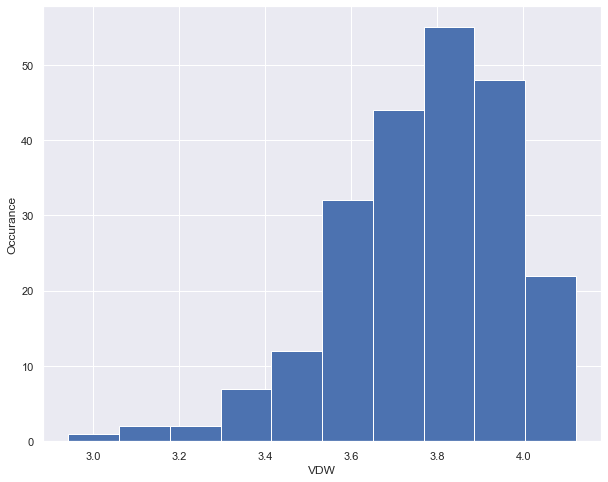

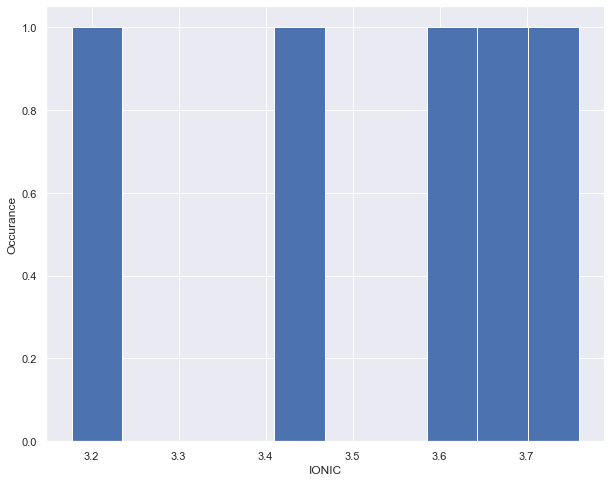

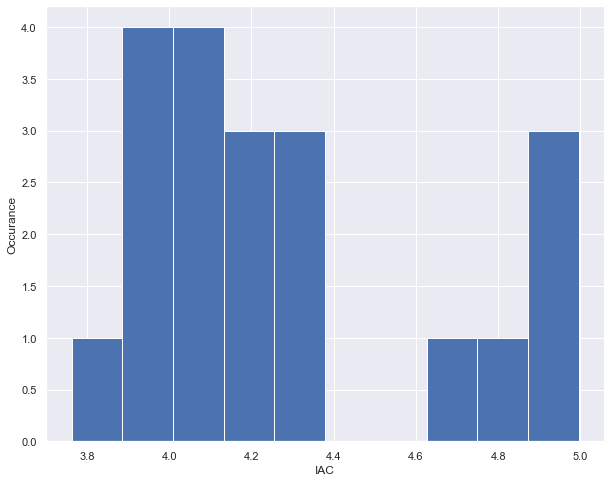

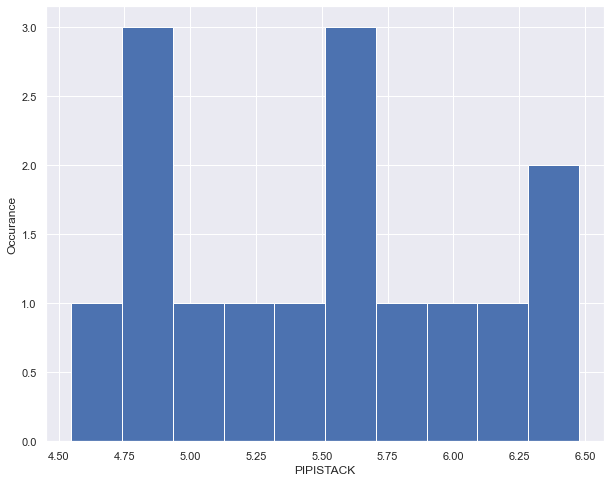

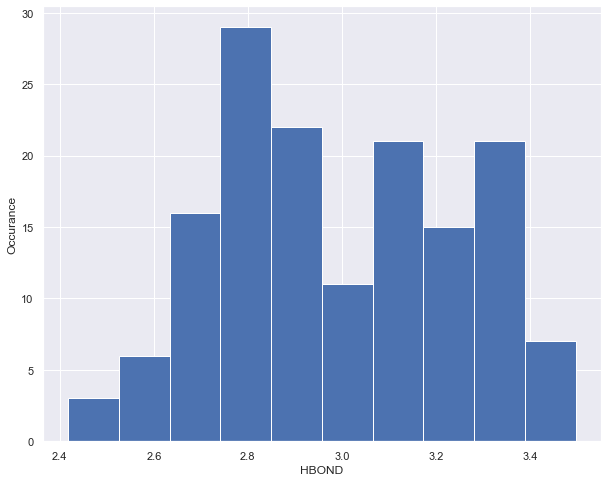

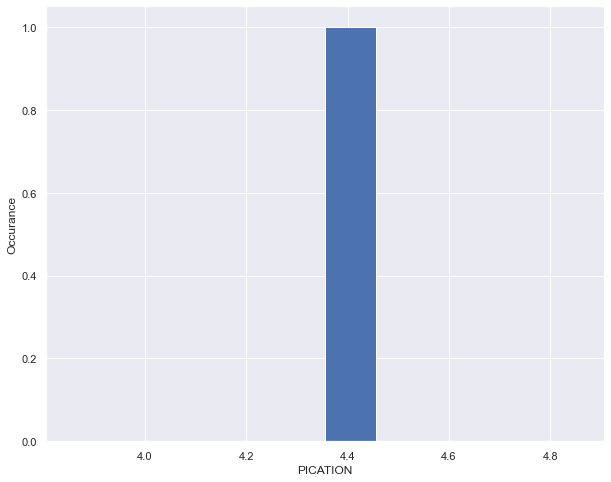

In [62]:
for int_type in set(database.keys()):
    fig , ax = plt.subplots(figsize = (10,8))
    plt.hist(database[int_type], bins=10)
    plt.xlabel(int_type)
    plt.ylabel('Occurance')